In [1]:
pip install scikit-learn matplotlib seaborn xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.0/124.9 MB 3.0 MB/s eta 0:00:42
    --------------------------------------- 1.6/124.9 MB 3.0 MB/s eta 0:00:42
    --------------------------------------- 1.8/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 2.6/124.9 MB 2.5 MB/s eta 0:00:50
   - -------------------------------------- 3.1/124.9 MB 2.6 MB/s eta 0:00:48
   - -------------------------------------- 3.7/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.2/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.7/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 5.2/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 5.8/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 6.0/124.9 MB 2.4 MB/s eta 0

C:\Users\jalin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jalin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance of AdaBoost:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Performance of Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1

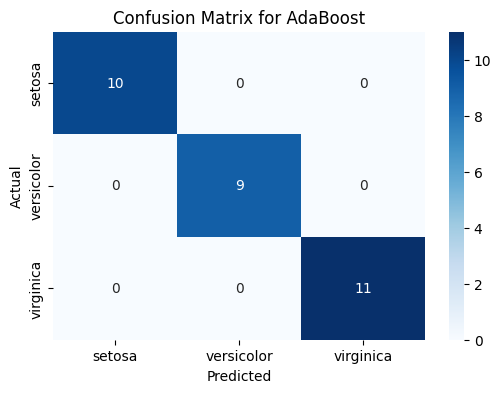

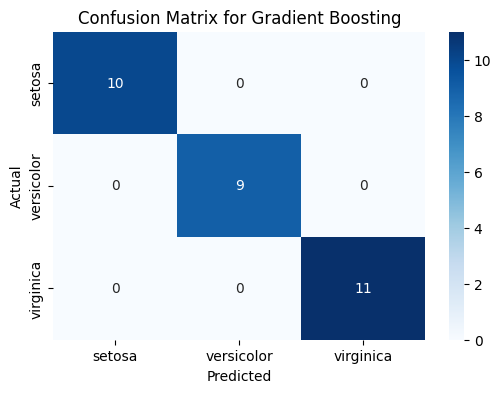

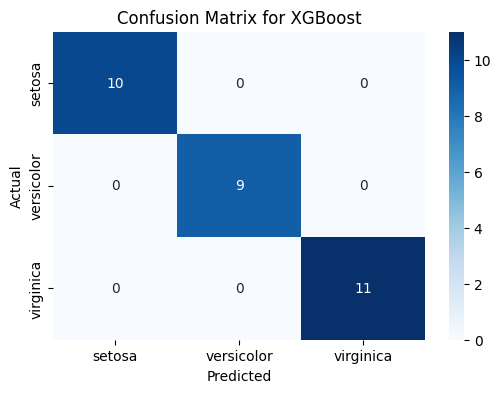

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train models
ada_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
ada_pred = ada_model.predict(X_test)
gbm_pred = gbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
    print("-" * 60)

# Evaluate each model
evaluate_model(y_test, ada_pred, "AdaBoost")
evaluate_model(y_test, gbm_pred, "Gradient Boosting")
evaluate_model(y_test, xgb_pred, "XGBoost")

# Plot confusion matrices for all models
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices for AdaBoost, Gradient Boosting, and XGBoost
plot_confusion_matrix(y_test, ada_pred, "AdaBoost")
plot_confusion_matrix(y_test, gbm_pred, "Gradient Boosting")
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")
